### Scribers
    Alipour Mina
    Magoshi Vincent 
    Mayeshiro Brian
    Gaoiran Maria

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

from IPython.display import Image


from scipy.optimize import curve_fit


import matplotlib.ticker as plticker

%matplotlib inline




### what is Time series data modeling
Time series Analysis helps us understand what are the underlying forces leading to a particular trend in the time series by identifying variability of parameters and helps us in forecasting and monitoring the data points by fitting appropriate models as possible. 

### what is Time Series data
  According to https://en.wikipedia.org/wiki/Time_series, A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Time Series are complex and warrant an entire courses and very broad. We will consider univariate time series meaning one item varies across time


### Time Series's data properties

Time series data are different from data we used perviously with regards to two different aspects :

  In time series data, observation a time $t$ is dependent on observation at time $t-1$ so data points are not independent from each other, for example, if we look at stock price today ,the next day price depends on price of today. Same for US dollar value, tomorrow's value depends on  dollar value of today. 
  Also, ordering of data matters, if we take time series data set and shuffle it ,it will gives us a different set of behavior system from original data set.
    In addition ,in this course we used to work with data from gaussian, normal distribution or poisson distribution and we assume that data comes from same distribution so data is identical and independant, but in time series, data come from  different distributions in a 'same class', for example, some set of data come from a gaussian distrubution with mean of 0 and std of 100 and another set of data come from differently parametrized gaussian distribution with mean of 50 and std of 200.


### Examples of Time Series 
Time series is a collection of quantitative observations that are evenly spaced in time and measured successively. some examples of time series: 
  - Hourly readings of air temperature
  - The continuous monitoring of a person’s heart rate
  - The number of cars that pass an intersection over time on daily basis or hourly basis
  - The number of travelers arriving at HNL over time for exmaple we count number of travelers very day for entire year and also we can see some variention becuase it is time series 
  - Weight as an outcome of a diet over time testing conditional on some diets for whole year we will see some fluction over time 
  - Cross sectional data where we study populatiom 3 time point before medication, during medication and after medication but this is not consider a time series
  


### Class of Time Series data

  There is two class of Time Series data which studied independently, we use parametric and non-parametric approaches to looking at them, before we explain these approaches we need to define trend, seasonality and noise.
    
- Trend: The optional and often linear increasing or decreasing behavior of the series over time.
- Seasonality: The optional repeating patterns or cycles of behavior over time.
- Noise: The optional variability in the observations that cannot be explained by the model.
  
   For the first classes of data (parametric) is well behaved and showing combination of trend and seasonality that we use Regression modeling, where we use the time component (trend and season plus some noise) in the model to find a mathematical function that fits data (Y values) . For instance, the revenue of H&R blocks ,a data set which is seasonal with fluctuation during tax season, the shape of function can be modeled using `sine` or `cosine` functions. Another example is global temperature and co2 values, where we model them using a linear functions.
    
  For the second classes of data (non-parametric) which not behave in deterministic way, we use past values to help to indicate future values. These are very complex and we can not model them over the time by using `sine`,`cosine`and  linear functions ,instead ,we  use valued accured in near past or average a duration of past(values of accuring in $t-1$,$t-2$,$t-3$,...) with noise , therefore ,variability and accuracy of future data is depend on past values. These models are very common with lot of variability for example econometrics, finance, atmospheric sciences, etc.


### Types of Time series


Showing the first class of data which is combination of trend, seasonality, and noise (ex. CO2 levels in the atmosphere)

  $v_t = f(t) + s(t) + \epsilon_t$, `f` is trend function and `s`  a seasonality function


Showing the second class of data with Random walks where the value of today depends of past values. Noises are values generated from random distribution using gaussian with Mu and STD (ex. Stock returns)
 
  $V_t= V_{t-1} + \epsilon_t$, where $\epsilon ~\sim \mathcal{N}(\mu, \sigma)$ 




In [3]:
### Types of Time series: A Random Walk

#generate 20 values
v = np.zeros(20)
#we draw random noises(white gussion noises)
mu = 0,
sigma = 1

#data with random walk
for t in range(1,20):
    v[t] = v[t-1] + np.random.normal(0,1)

v

array([ 0.        , -1.33053774, -0.70122583, -2.09022239, -3.05513503,
       -2.76562717, -2.68819171, -2.19484224, -3.53631495, -3.32756217,
       -3.74090369, -3.40680371, -4.7519382 , -4.36971154, -2.35285001,
       -1.3823579 , -1.75116229, -1.90736396, -2.40783462, -2.80580078])

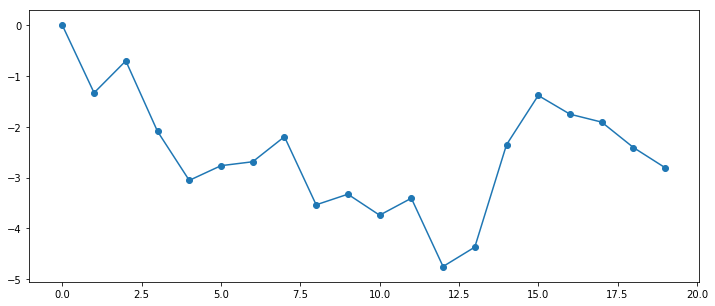

In [4]:
plt.figure(figsize=(12,5))

plt.plot(np.arange(20), v)

plt.scatter(np.arange(20), v)

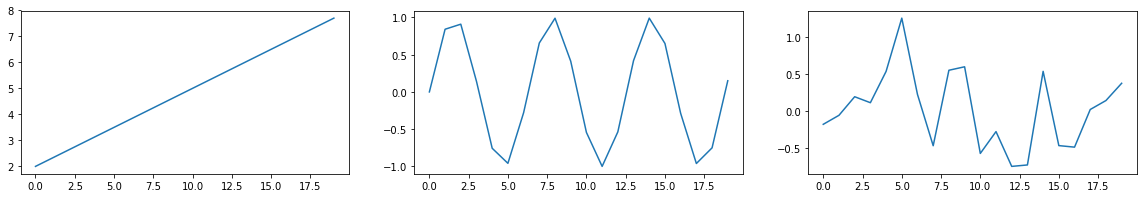

In [5]:
#type of time series: data with trend and seasonality
plt.figure(figsize=(20,3))
#observation is x axis
x_axis = np.arange(20)
trend = np.zeros(20)
seasonaility = np.zeros(20)
noise = np.zeros(20)
#intersept
a =2 
#b is slope
b = 0.3
#data with trend and seasonality
for i in np.arange(20):
    trend[i] = a + b * x_axis[i]
    seasonaility[i] = np.sin(x_axis[i])
    noise[i] = np.random.normal(0,0.5)    

plt.subplot(1,3,1)
plt.plot(x_axis, trend)
plt.subplot(1,3,2)
plt.plot(x_axis, seasonaility)
plt.subplot(1,3,3)
plt.plot(x_axis, noise)


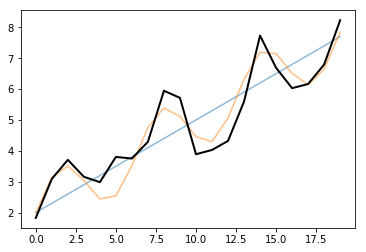

In [6]:
#overlaping to get time series
plt.plot(x_axis, trend, alpha=0.5)
plt.plot(x_axis, trend+seasonaility, alpha=0.5)


plt.plot(x_axis, trend + seasonaility + noise, linewidth=2, c='k')



### Time Series Examplee: Mauna Loa Dataset

We are going to look at $CO_2$ values in the atmosphere as measured on Mauna Loa on the Big Island.
The data was recorded monthly between 1959 and 1999
and we model this dataset to highlight the three different components of time series

$$ 
TimeSeries  ~~~~~~~~\overline{\underline{\text{ is compsed of}}}    ~~~~~~~~Trend + Seasonality + Stochastic ~Fluctuations
$$



In [7]:
#this data set has trend and seasonality
co2_data = pd.read_csv("./data/carbon_dioxide.txt", names=["co2_val"])

In [8]:
co2_data.head()

,co2_val
0,315.42
1,316.32
2,316.49
3,317.56
4,318.13


### `pandas` and Time Series 
The functionality and behavior to work with series data is slightly different from non series data. `pandas` makes it extremely easy to work with time series. It is the reason that `pandas` became very popular with its varoius functionality to work with data series, For instance, Aligning multiple time series, subsample, impute missing values, etc .We will cover some functionality but refer to Wes McKinney for thorough coverage;
   * Chapter free online (link on the course website)
   * Documentation on https://pandas.pydata.org/pandas-docs/stable/timeseries.html    

In [9]:
# generates ranges as timestamps, which are more appropriate for time series data
# Index is of type `pandas Timestamps`

dateIndex = pd.to_datetime((pd.date_range('1/1/1959', periods = len(co2_data), freq= "MS")))
co2_data.index = dateIndex

In [10]:
print(co2_data.index)

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '1990-03-01', '1990-04-01', '1990-05-01', '1990-06-01',
               '1990-07-01', '1990-08-01', '1990-09-01', '1990-10-01',
               '1990-11-01', '1990-12-01'],
              dtype='datetime64[ns]', length=384, freq='MS')


In [11]:
co2_data.head()

,co2_val
1959-01-01,315.42
1959-02-01,316.32
1959-03-01,316.49
1959-04-01,317.56
1959-05-01,318.13


/home/muzamil/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(715145.0, 726468.0)

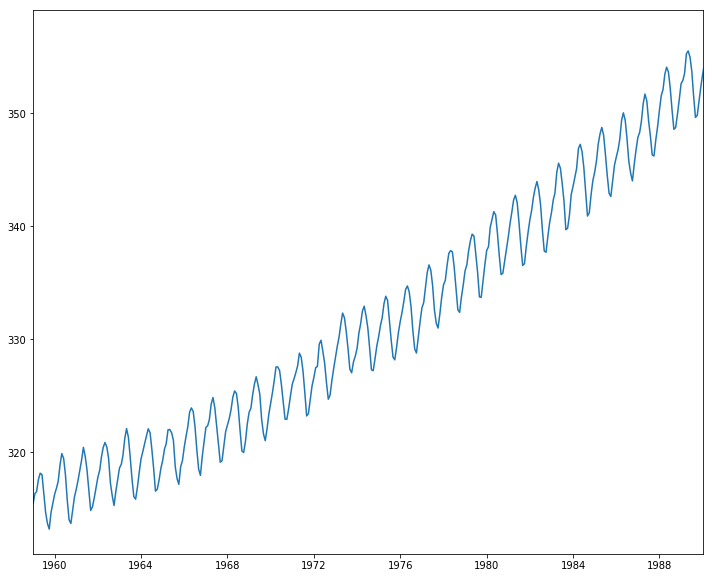

In [12]:
#using plot to see trend and seasonality in the data set
plt.figure(figsize=(12,10))

plt.plot(co2_data['co2_val'])
plt.xlim('1959', '1990')


### Indexing `datetime`

 Now, what we need to do is to decompose the data to trend, seasonlity and noise. starting indexing datetime values:
 
 Values of `DataFrame` with a `datetime64` index can be accessed using a partial strings.Using 'year' or 'year-month' or 'year-month-day', etc...,
 This includes using partial strings in ranges and the end index is included in the results.



In [13]:
co2_data['1960']

,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87
1960-06-01,319.43
1960-07-01,318.01
1960-08-01,315.75
1960-09-01,314.00
1960-10-01,313.68


In [14]:
co2_data['1960-4']

,co2_val
1960-04-01,318.87


In [15]:
#selesting data randomly we select year 
co2_data['1960-9':'1961-3']

,co2_val
1960-09-01,314.00
1960-10-01,313.68
1960-11-01,314.84
1960-12-01,316.03
1961-01-01,316.73
1961-02-01,317.54
1961-03-01,318.38


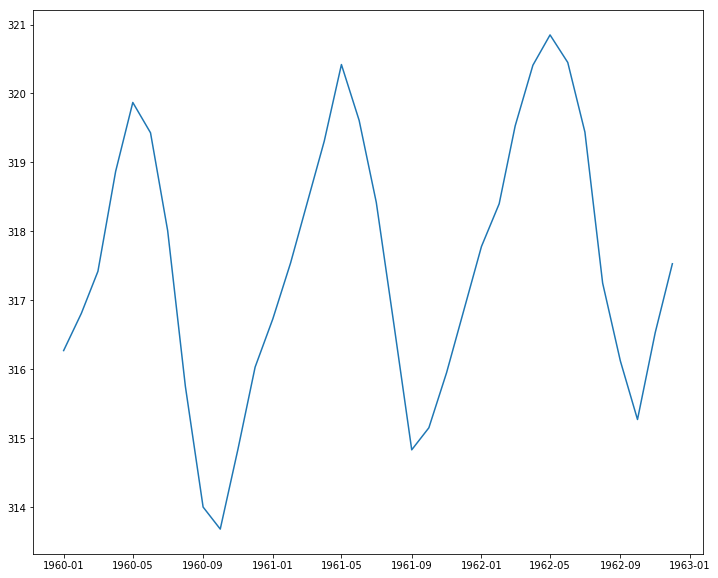

In [16]:
plt.figure(figsize=(12,10))
plt.plot(co2_data['1960':'1962']['co2_val'])

### Accessing the Subsets of the DateTime Object

 we get a subsample  of data to find seasonlity and trend in data, here we subsample 4 years of data, but it is something you should think before subsampling your data. Since the index is a `timestamp`, we can easily access subsets of the `timestamp`
 
  For example: day, day of the week, month, month_name, etc...
 

In [17]:
co2_data.index.day


Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', length=384)

In [18]:
co2_data[co2_data.index.year.isin(['1960', '1970'])]

,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87
1960-06-01,319.43
1960-07-01,318.01
1960-08-01,315.75
1960-09-01,314.00
1960-10-01,313.68


In [19]:
sample_4years = co2_data[co2_data.index.year.isin(['1960', '1970', '1980', '1990'])]
sample_4years.head()


,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87


In [20]:
print(sample_4years.index.year)
print("\n----------\n")
print(len(sample_4years.index.year))


Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            1960, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            1970, 1970, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            1980, 1980, 1980, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
            1990, 1990, 1990, 1990],
           dtype='int64')

----------

48


In [21]:
sample_4years['1960']

,co2_val
1960-01-01,316.27
1960-02-01,316.81
1960-03-01,317.42
1960-04-01,318.87
1960-05-01,319.87
1960-06-01,319.43
1960-07-01,318.01
1960-08-01,315.75
1960-09-01,314.00
1960-10-01,313.68


### Modeling the Trend and Seasonality

The first step to modeling a time series is determining how to model its individual components. Recall that a time series is composed of three parts: the trend, seasonality, and stochastic fluctuations. As is the nature of randomness, the stochastic fluctuations cannot be predicted and consequently cannot be modeled. Therefore, this step focuses solely on modeling the **trend** and **seasonality** of the time series, but not the stochastic fluctuations. 

Modeling a time series is often exploratory in nature; it requires astute observational skills to identify possible functions that would match the data. This requires both practice and a solid understanding of how curves are shaped based on their function. 
The process is best understood through an example, which is shown below using the Mauna Loa dataset introduced above. Though the trend is typically modeled before the seasonality, in the following tutorial, the seasonality is modeled prior to the trend.

### Modeling the Seasonality

The "**seasonality**" of a time series refers to patterns that occur in specific, regular intervals.
There are 3 main steps to modeling the seasonality:
1. Exploring the seasonality
2. Forming a hypothesis
3. Writing and testing the model to account for the trend and seasonality


###  1- Exploring the Seasonality

As noted above, the process of modeling is exploratory in nature. Therefore, it is fitting that the first step of modeling seasonality is to explore the data, observing and determining the patterns, or seasonality, within it. When looking at the data, the observer should ask themselves some questions that can help identify the type of seasonality that exists.

Possible questions include:

* **Is the data seasonal?** Determine whether the changes in direction do or do not follow a pattern.
* **What is the period, or length, of the seasonality?** Note when the pattern repeats itself, particularly when it starts and ends. 
* **What are the lows and highs?** Find where the data peaks and dips. If these occur in generally the same location for each period, then it will be easier to detect the pattern.
* **Is the seasonality consistent?** The data may sometimes be seasonal, or may vary in when the pattern occurs. Note how much variation occurs as this may be useful in determining the underlying function.

#### Mauna Loa Example

See how these questions can be applied to the Mauna Loa dataset in the example below. Though any method can be used to observe and identify seasonality, it may be helpful to plot the data as a simple line graph. The $CO_{2}$ value of every 10th year between 1960 and 1990 is plotted in 4 separate subplots. These plots are arranged in a single column to better compare the shape of the curve.

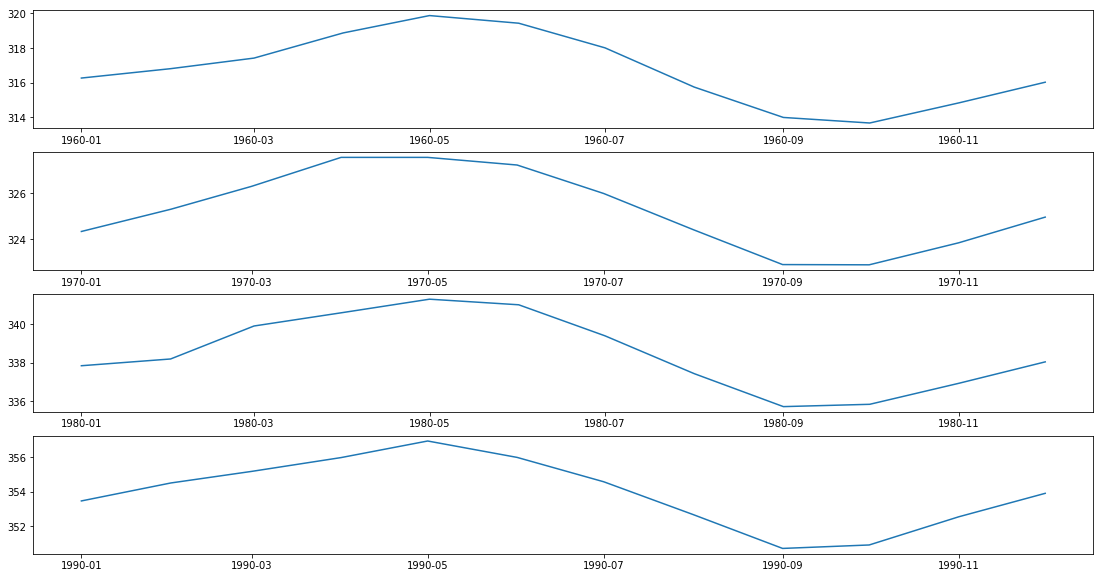

In [22]:
plt.figure(figsize=(19,10))
plt.subplot(4,1,1)
plt.plot(sample_4years['1960']['co2_val'])
plt.subplot(4,1,2)
plt.plot(sample_4years['1970']['co2_val'])
plt.subplot(4,1,3)
plt.plot(sample_4years['1980']['co2_val'])
plt.subplot(4,1,4)
plt.plot(sample_4years['1990']['co2_val'])
    

In this arrangement, it is easy to see that the data **generally follows the same curve every 10th year.** 

This indicates that the data is seasonal, with a period of one year. Note how all four years follow the same pattern: the values increase starting from January, peak around May, decrease until a low around September, then increase into the new year. The curves also indicate that the seasonality is at least consistent every 10th year. If the observer would like to confirm if this pattern applies to every year, then they would plot the $CO_{2}$ values for each year individually and compare them side by side.

Thinking back on the questions posed above, the plot has been able to answer nearly all of them:

* **Is the data seasonal?** Yes, the data appears to repeat a pattern every 10th year between 1960 and 1990.
* **What is the period, or length, of the seasonality?** The pattern persists for a year, beginning in January and ending in December.
* **What are the lows and highs?** The highs are near May and lows are near September.
* **Is the seasonality consistent?** The above four plots indicate that the seasonality occurs at least every 10th year. To determine whether the seasonality consistently occurs every year, each year would need to be plotted.


### Using a Boxplot to Explore Seasonality

Aside from line graphs, another method to exploring seasonality is by plotting data using boxplots.

A boxplot is a visual representation of a distribution divided by 5 values: the minimum, 1st quartile, median, 3rd quartile, and maximum. The interquartile range (IQR) consists of the area between 1st and 3rd quartile markers, including the median. It is named the interquartile range because it contains values within the 25th and 75th percentile of the data.

<img src="images/boxplot.png" alt="drawing" style="width:300px;"/>

A boxplot is useful in identifying outliers, which exist outside of the minimum or maximum boundaries. It also serves as a good representation of whether a dataset is symmetrical, tightly grouped, or skewed.

For more information, [Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) provides a thorough explanation of boxplots.

#### Mauna Loa Example

Observe the Mauna Loa dataset once more. Currently, each data entry is based on a month-year identifier.

The following code also adds two additional columns to the DataFrame, "Month" and "Year", which identify the month in an abbreviated string format and the year in numerical format.

In [23]:
# Examine seasonal trend in the data

co2_data['Month'] = co2_data.index.strftime('%b')
co2_data['Year'] = co2_data.index.year

co2_data.head()

,co2_val,Month,Year
1959-01-01,315.42,Jan,1959
1959-02-01,316.32,Feb,1959
1959-03-01,316.49,Mar,1959
1959-04-01,317.56,Apr,1959
1959-05-01,318.13,May,1959


The previous example grouped these values by year before plotting it in adjacent line graphs. Instead of using the current arrangement, the data can be rearranged to group the values by month. In doing so, the data can be analyzed in a different perspective. Different methods of exploring the time series will be useful in identifying the seasonality, as it avoids bias by taking into account multiple perspectives.

#### Using a Pivot Table To Rearrange the Data

A pivot table is a table that summarizes details of a larger, more complicated table by rearranging the index, columns, and values.

More information on pivot tables can be found on the [Wikipedia entry on pivot tables](https://en.wikipedia.org/wiki/Pivot_table).

Conveniently, the pandas DataFrame has a function "pivot" that takes 3 arguments ("index", "columns", and "values") and returns a pivot table. Each argument takes a column of the DataFrame that will be used for its namesake. For example, the values of the column provided to the "index" argument will be used as the index of the resulting pivot table.

The following code rearranges the Mauna Loa data to group the $CO_{2}$ values by month, indexed by year. The index comes from the values in the "Year" column, the columns from the "Month" column, and cell values from the "co2_values" column.

In [24]:
co2_data_piv = co2_data.pivot(index='Year', columns='Month', values='co2_val')
co2_data_piv.head()


Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1959,317.56,314.66,315.43,316.32,315.42,316.39,318.00,316.49,318.13,314.66,313.18,313.68
1960,318.87,315.75,316.03,316.81,316.27,318.01,319.43,317.42,319.87,314.84,313.68,314.00
1961,319.31,316.64,316.85,317.54,316.73,318.42,319.61,318.38,320.42,315.95,315.15,314.83
1962,320.41,317.25,317.53,318.40,317.78,319.44,320.45,319.53,320.85,316.53,315.27,316.12
1963,321.22,317.61,318.20,318.92,318.58,319.58,321.31,319.70,322.08,316.91,315.83,316.05


Note how the columns of the pivot table are organized alphabetically instead of by month order. The pandas DataFrame can reorder the columns by calling the function "reindex" and providing a sorted list of the column names to the "columns" argument.

In [25]:
# We reindex the data to have the months in order
orderedMonths = ["Jan", "Feb", "Mar", 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
co2_data_piv = co2_data_piv.reindex(columns=orderedMonths)
co2_data_piv.head()

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1959,315.42,316.32,316.49,317.56,318.13,318.00,316.39,314.66,313.68,313.18,314.66,315.43
1960,316.27,316.81,317.42,318.87,319.87,319.43,318.01,315.75,314.00,313.68,314.84,316.03
1961,316.73,317.54,318.38,319.31,320.42,319.61,318.42,316.64,314.83,315.15,315.95,316.85
1962,317.78,318.40,319.53,320.41,320.85,320.45,319.44,317.25,316.12,315.27,316.53,317.53
1963,318.58,318.92,319.70,321.22,322.08,321.31,319.58,317.61,316.05,315.83,316.91,318.20


Now that the $CO_{2}$ data is organized into months, it can be plotted using the seaborn package function "boxplot". boxplot requires a "data" argument, which is a DataFrame of the data to be plotted as boxplots. In this example, the pivot table is provided. 

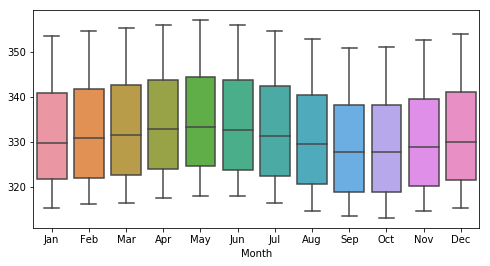

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=co2_data_piv)

The resulting boxplot returns similar conclusions to the ones drawn from the line graphs.

The width of the distributions are about the same every month, except shifted. This shift follows the same pattern recognized earlier. That is, the distribution follows an upward shift from January through May, then follows a downward shift to September, after which the distribution again shifts upward until December. This indicates that **regardless of the year**, the $CO_{2}$ values are lower in January than February, which is lower than the values in March, which are lower than the values in April, which are lower than the values in May. The same is true for the downward motion from May to September and the upward motion from September to December.

### 2- Forming a Hypothesis

After exploring the data through different visualizations, the next step is to form a hypothesis on the seasonality of the time series. Both plots indicated that the seasonality looks sinusoidal with a period of one year. Although the line plots only exploted four years-worth of data, the box plot representations indicated the presence of a consistent seasonality signal.


Now that a hypothesis was formed about the seasonality of the data, the next component to explore is the trend. Note that the order of discovery doesn't matter, since each component is typically explored by removing the other component of the data as "noise", isolating it and making it easier to identify. Hence, the trend can be explored and hypothesized before the seasonality, or vice versa.

### 1- Exploring the Trend

Once again, the first step to modeling the trend is exploring the data. Any visualization can be used to help identify the trend, if present. When exploring the trend, it is useful to think of anything - functions, curves, directional motion - that can identify the trend. For example, the data can appear to be power law-like, quickly increasing, logarithmic, or slightly decreasing, which can all hint at the underlying trend function.

In the example below, a boxplot is again utilized for exploring the data. The following line designates a column "year" in the sample_4years DataFrame that will be used as the x-axis of the boxplot. The values of this column are the corresponding numerical year of the data according to the index.

In [27]:
sample_4years['year'] = sample_4years.index.year

/home/muzamil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Recall that sample_4years is a slice of the original Mauna Loa dataset, including data only from years 1960, 1970, 1980, and 1990. It is plotted below again using the seaborn "boxplot" method, along with additional parameters "x" and "y" to denote which columns to use as the plot's x and y axes. 

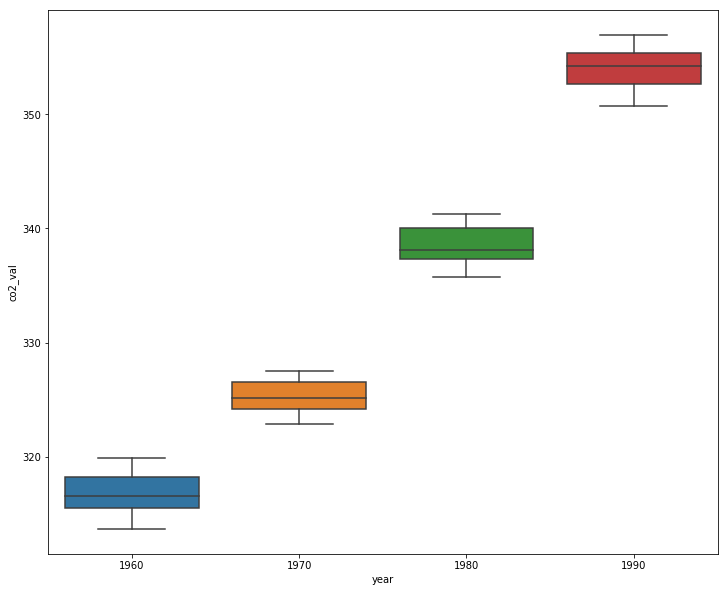

In [28]:
plt.figure(figsize=(12,10))
sns.boxplot(x="year", y="co2_val", data=sample_4years)

The resulting plot has 4 separate boxplots depicting the distribution of $CO_{2}$ values for years 1960, 1970, 1980, and 1990. Observe that the distribution widths differ only slightly, though the averages of the distributions are **consistently** increasing, not randomly. This indicates an increasing trend in the time series.

### Averaging Data Per Period

The above plot indicated an increasing trend every 10 years, but did not specify the trend over all years. By averaging the $CO_{2}$ values per year and plotting this data, the overall trend can be examined further. 

Previously, the DataFrame's "groupby" method has been used to group data. Instead, the following example will take advantage of the DateTime index of the DataFrame and call "resample", a function that takes time related parameters that indicate how the data will be grouped. In this case, the data is grouped by "AS" or "Annual Start", meaning the data is grouped annually and assigned to the start of the group.

After resampling, the data is summed in each group and plotted.

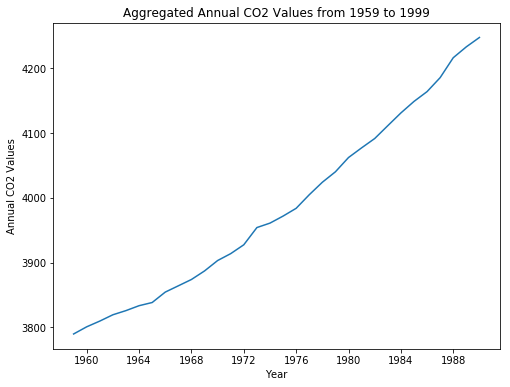

In [29]:
_, ax = plt.subplots(figsize=(8,6));

annual_sums =  co2_data['co2_val'].resample('AS').sum()
sns.lineplot(data=annual_sums)

ax.set_title('Aggregated Annual CO2 Values from 1959 to 1999');
ax.set_ylabel('Annual CO2 Values');
ax.set_xlabel('Year');
ax.xaxis.set_ticks_position('bottom')


### 2. Forming a hypothesis

Using the observations from the previous step, form a hypothesis on the trend of the time series. Both visualizations showed that the data followed a trend, particularly a continuous increase in $CO_{2}$ concentrations over time.

### Time Series  Modeling Tips

#### Alter Axes for Data to Move through the Origin

Note that the above line plot has some spacing before and after the plotted values begin. It is desirable to have the data move through the origin instead, as it will be easier to alter a function representing the data. To rectify the misalignment above, one can subtracting the offset from each datapoint, effectively shifting the time series.

#### Numerical X-Axis

Additionally, the above plot uses dates to label the x-axis. As it is more difficult to model data with date or string labels, the x-axis is best represented in numerical form. This can be achieved by replacing the year and/or month by a sequential number representing the number of months since the first measurement.
  
For example, instead of using the above code to model the trend, consider using "tsplot" instead of "lineplot". Unfortunately, "tsplot" is deprecated and will be removed from the seaborn library in the future. 


/home/muzamil/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/muzamil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


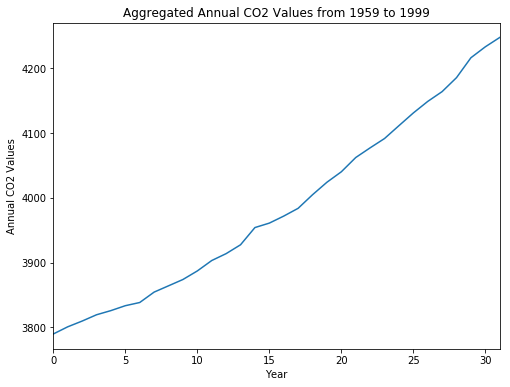

In [30]:
_, ax = plt.subplots(figsize=(8,6));

annual_sums =  co2_data['co2_val'].resample('AS').sum()
sns.tsplot(annual_sums)

ax.set_title('Aggregated Annual CO2 Values from 1959 to 1999');
ax.set_ylabel('Annual CO2 Values');
ax.set_xlabel('Year');
ax.xaxis.set_ticks_position('bottom')


The below example shows how the data can be shifted to pass through the origin, also known as "normalizing" the data. The first line of code subtracts the first $CO_{2}$ value from every $CO_{2}$ value in the time series, essentially setting the initial value to 0 and all remaining values to the relative distance they are from the initial value. Thus, the y-axis will represent the normalized $C0_{2}$ values instead of the actual values.

The second line of code re-indexes the time series to begin at Year 0, then increases based on difference in years since Year 0. Thus, the x-axis represents the year relative to the initial year instead of the actual year date.

/home/muzamil/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/muzamil/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


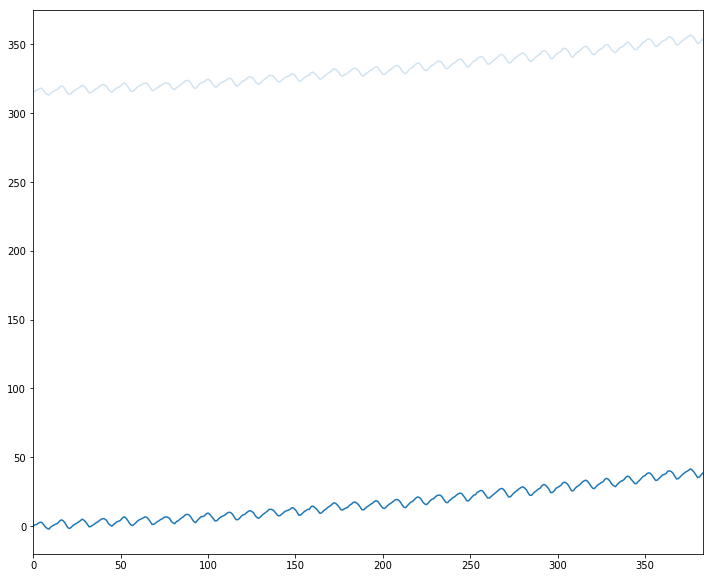

In [31]:
normalized_col =  pd.DataFrame(co2_data['co2_val'] -  co2_data['co2_val'].iloc[0])
normalized_col.index = range(0,len(normalized_col))

plt.figure(figsize=(12,10))

sns.tsplot(co2_data['co2_val'], alpha=0.2)
sns.tsplot(normalized_col['co2_val'])


### Using an Appropriate Model for the Trend

After forming a hypothesis, the trend can be modeled. Unfortunately, the model will never exactly match the data since it also contains stochastic noise and seasonality. While modeling the trend, the seasonality can be essentially ignored as noise and modeled at a later ime.
    
Begin modeling the data by describing the trend in the data. Refer to the observations from _Step 1- Exploring the Trend_. The trend was increasing at what appeared to be greater than linear. From prior knowledge, the observer must identify a function that increases greater than linear, such as the power law:

$$
    f(x) = c_0 + x^m * c
$$

After deciding on an appropriate model for the trend, the noise must be taken into account before modifying the model to better fit the data.

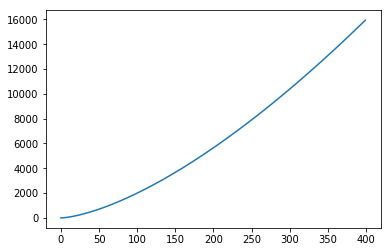

In [32]:
def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c

x = np.arange(0,400,1)
y = func_powerlaw(x, 1.5, 2, -1)
plt.plot(x,y)

# Working with Noisy Data in Time Series

If only interested in the trend, the noise in that data will also be seasonality.

Recall that Time Series data varies of some quantity over time.

Similarly to noise with regular data, Time Series noise also is an undesired addititve signal with **_constant mean, constant standard deviation, and independent values_**.

### Using the power law

To help with making approximations for the appropriate trend, the power law can be applied **_if_** the data seems to follow a trend similarly.

In [33]:
def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c

For the below example, a randomly generated dataset will be given an upward trend which will follow the power law.

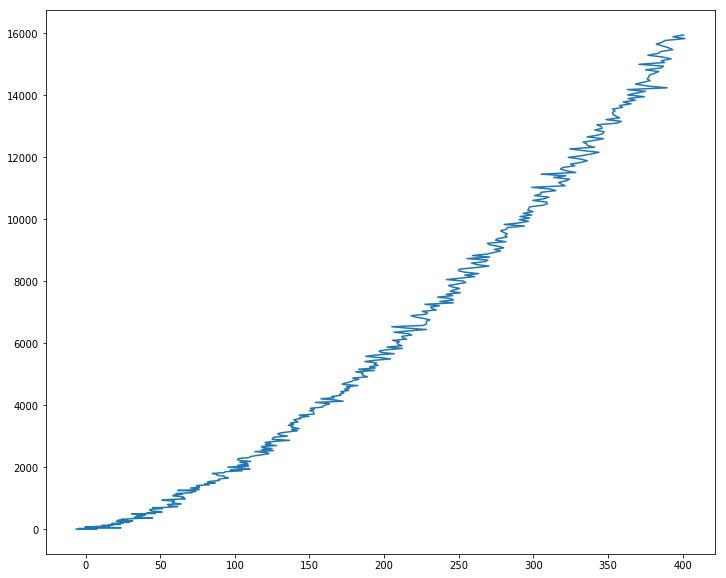

In [34]:
# noisy data example
x = np.arange(0,400,1)
y = func_powerlaw(x, 1.5, 2, -1)

plt.figure(figsize=(12,10))

apples = np.random.normal(x, 5)

plt.plot(apples, y)


Next, the _scipy_ curve_fit function can be used to help determine the most optimal "fit" given the data and its noise.

In [35]:
# popt is the optimal parameters found by the curve fit
# pcov is the estimated covariance of popt

popt, pcov = curve_fit(func_powerlaw, x, y)

/home/muzamil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


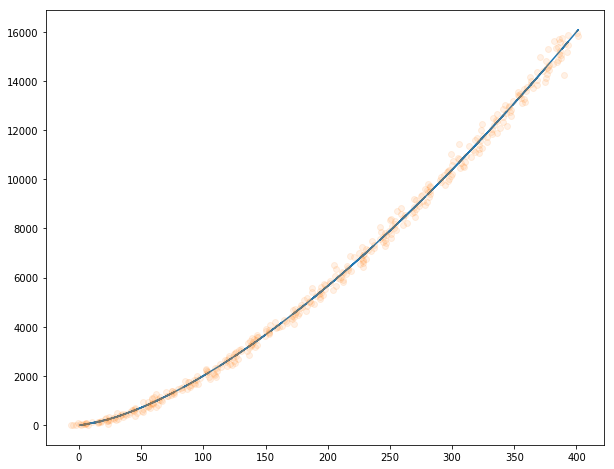

In [36]:
plt.figure(figsize=(10,8))
plt.plot(apples, func_powerlaw(apples, *popt), '-',)
plt.plot(apples, y, 'o', alpha = 0.1)

By using the curve_fit() function in scipy, our data can be optimized into a perfect fit. The data can be smoothed out.

## Subtracting the Trend

From here we can model the seasonal effect in the data. By subtracting the x-axis data (apples) with the func_powerlaw output, we can obtain the residual values.

/home/muzamil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/home/muzamil/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


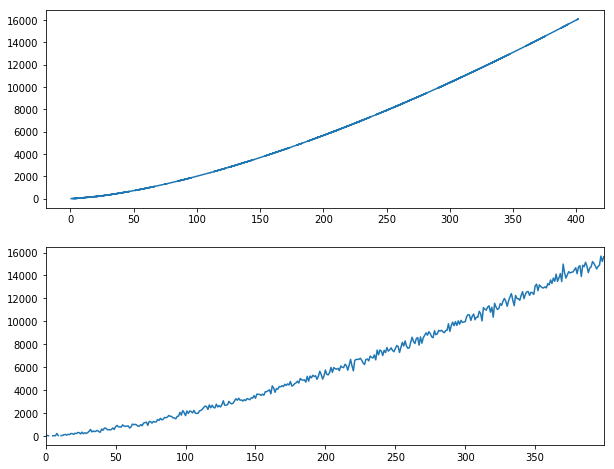

In [37]:
f, ax = plt.subplots(2, figsize=(10, 8))

ax[0].plot(apples, func_powerlaw(apples, popt[0], popt[1], popt[2]), '-', )

residuals = func_powerlaw(apples, popt[0], popt[1], popt[2]) - apples
sns.tsplot(residuals, ax=ax[1], )

In [38]:
def fx(x):
    trend = func_powerlaw(x, *popt) 
    seasonality = (3 * np.sin(2 * np.pi * x / 12)) + (0.75 * np.sin(2 * np.pi * x / 6)) 
    return trend +  seasonality

x_axis =  normalized_col.index
y_axis =  normalized_col['co2_val'].rolling(window=12, center=True).mean()
popt, pcov = curve_fit(func_powerlaw, x_axis[6:-6], y_axis[6:-6], maxfev=2000 )

residuals = normalized_col['co2_val'] - fx(x_axis)
residuals = pd.DataFrame(residuals)

# Discovering Autocorrelation in the Data

Autocorrelation is the correlation of a signal with a version of itself "lagged" by some ammount of time. In short it is how dates are correlated with prior dates. Autocorrelation is used to determine the correlation between current values in our dataset and past values. In this case, we are testing for autocorrelation in our residual data to guage whether we have fully taken out both the trend and seasonality from our data. When autocorrelation is detected in residual data, it typically means that the residual data is not purely noise and that more information can be extracted from it for our model.

/home/muzamil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


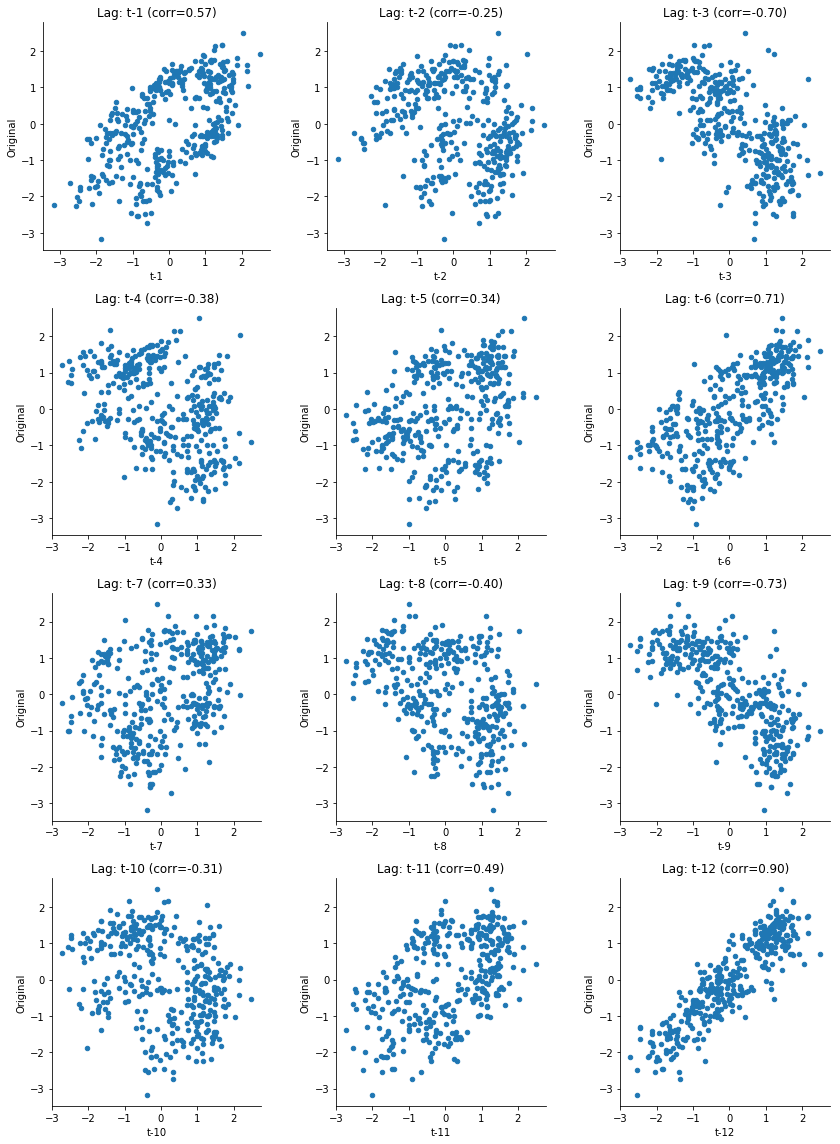

In [39]:
lags=12
ncols=3
nrows=int(np.ceil(lags/ncols))

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
    lag_str = 't-{}'.format(lag)
    # Create a Dataframe with a column for our original data and a column for our data shifted t months
    X = (pd.concat([residuals[0], residuals[0].shift(-lag)], axis=1,
                   keys=['y'] + [lag_str]).dropna())

    # Plot a scatterplot of the above dataframe
    X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
    # Calculate the correlation for the dataframe, extracting the value for the correlation between the
    #   original data and the shifted data from the resulting matrix
    corr = X.corr().as_matrix()[0][1]
    ax.set_ylabel('Original')
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
    ax.set_aspect('equal');
    sns.despine();

fig.tight_layout();

The above plots show the correlation between our residual data and the data lagged by t months (shifted t months). Correlation is measured on a -1 to 1 scale. A correlation of 0 means that there is no discernable correlation. A value close to 1 means that there is a large direct correlation, and a value close to -1 means there is a large negative (inverse) correlation.

For each point in each plot, the y position is the original datapoint in our residual data and the x position is the datapoint t months before the original. For highly positive correlated data (corr is close to 1) we can visually observe that the plot roughly looks like a line going from the lower left to the upper right. Similarly for highly negatively correlated data (coor is close to -1) we observe a rough line from the top left to the lower right. Uncorrelated data (corr near 0) appears globular with no clear shape or direction to the plot.

Since the above plots show that some autocorrelation does still exists in our residuals, most notably for t=12, it is reasonable to believe that some seasonality is still left in the residuals meaning our model could be further improved.

##### Further Reading:

&nbsp;&nbsp;<a href="https://www.displayr.com/autocorrelation/" target="_blank">An Overview of Autocorrelation</a><br>
&nbsp;&nbsp;<a href="https://www.investopedia.com/terms/a/autocorrelation.asp" target="_blank">Autocorrelation in Finance</a>

# Putting it all Together

Once we have determined the trend and seasonality, we can bring everything together to get a model of our data. We can combine the functions we found for trend and seasonality to build our model function. This model should line up closely with our data. 

/home/muzamil/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/muzamil/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


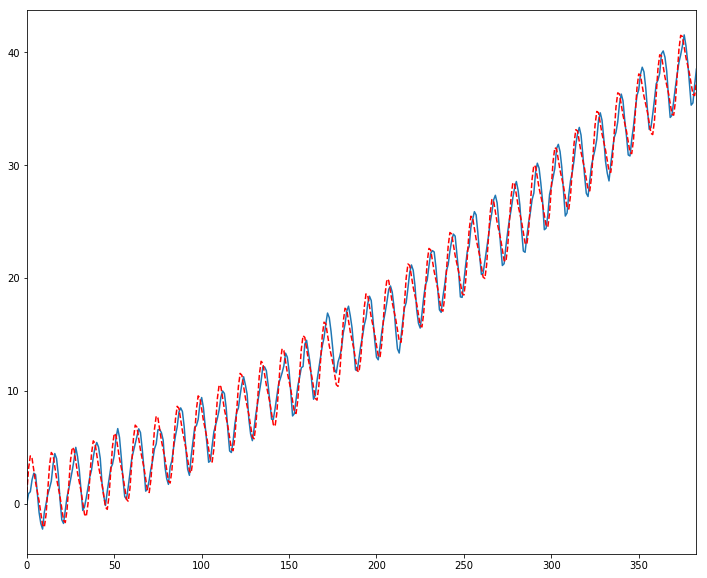

In [40]:
# Our model function which includes both trend and seasonality
def fx(x):
    trend = func_powerlaw(x, *popt) 
    seasonality = (3 * np.sin(2 * np.pi * x / 12)) + (0.75 * np.sin(2 * np.pi * x / 6))
    return trend +  seasonality

ax = plt.figure(figsize=(12,10))

# Plot our normalized data
sns.tsplot(normalized_col['co2_val'])
# Plot our model over the range of our data
sns.tsplot(fx(x_axis), linestyle='--', color='r') 


The above graph contains both our derived model and the normalized data for the level of CO2 in the atmosphere. Our model is the dashed red line and the normalized data is the solid blue line. It is useful to verify the integrity of the model by comparing its predictions for a period of time to our known data for that time period. Visually, we can observe that our model fits the data rather well since our model closely aligns with the data. Since we have accounted for residuals, we assume that random noise is the primary cause of any deviation between our model and the true data.

### Predicting future data
Knowing that our model of trend and seasonality is accurate for determining CO2 levels in the past is neat and has its applications, but what we want to do is predict future CO2 levels, or levels for dates that are not within the range of our data. Once we have our model, we can feed it dates in the future to make predictions of future CO2 levels. In the following code section we will predict 3 additional years (36 months) of CO2 levels past the last recorded date in our data.


/home/muzamil/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/muzamil/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


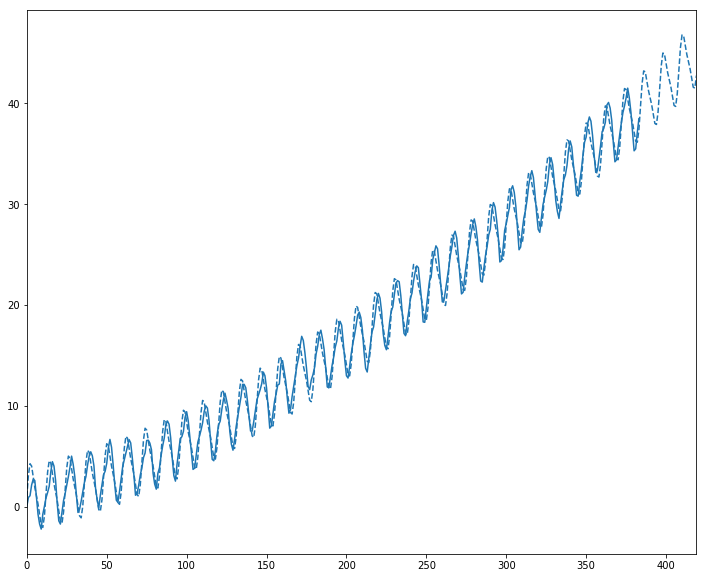

In [41]:
ax = plt.figure(figsize=(12,10))

# Select a range of x values that contains 36 more values than our data
x_axis = np.arange(0, len(normalized_col['co2_val'])+36, 1)

# Plot our data
sns.tsplot(normalized_col['co2_val'])

# Plot our model for the range of dates in our data plus 36 (three years)
sns.tsplot(fx(x_axis), linestyle='--') 


In the above graph, we have plotted both our known data, and the results of our model extending out 36 months (or three years) past the end of our data. Our model is the dashed line while our data is the solid line. Since without intervention we can reasonably assume that data trends and seasonality will remain about the same, we can simply use our model with future dates to make an informed prediction of what the value would be at that date.